In [1]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# this is the size of our encoded representations
encoding_dim = 32 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
 
# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='relu')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()
# normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [4]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
# encode and decode some digits
# note that we take them from the *test* set
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)

Epoch 1/100
235/235 [==============================] - 2s 8ms/step - loss: 0.3327 - val_loss: 0.2439
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2300 - val_loss: 0.2192
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2127 - val_loss: 0.2044
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2019 - val_loss: 0.1976
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1902 - val_loss: 0.1800
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1968 - val_loss: 0.1950
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1809 - val_loss: 0.1814
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1724 - val_loss: 0.1703
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1652 - val_loss: 0.1750
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1677 - val_lo

235/235 [==============================] - 2s 6ms/step - loss: 0.1681 - val_loss: 0.1740
Epoch 82/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1674 - val_loss: 0.1737
Epoch 83/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1572 - val_loss: 0.1492
Epoch 84/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1669 - val_loss: 0.1639
Epoch 85/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1658 - val_loss: 0.1590
Epoch 86/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1574 - val_loss: 0.1498
Epoch 87/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1606 - val_loss: 0.1504
Epoch 88/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1526 - val_loss: 0.1478
Epoch 89/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1557 - val_loss: 0.1548
Epoch 90/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1635 - val_loss:

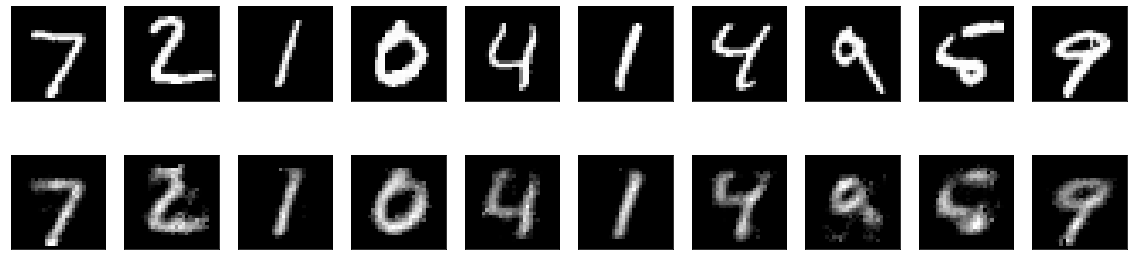

In [5]:
n = 10 # how many digits we will display
plt.figure(figsize=(20, 5))
for i in range(n): #display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()